In [70]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud

In [71]:
filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [72]:
##################################################
# 1. Text Preprocessing
##################################################

In [73]:
df = pd.read_csv("datasets/amazon_reviews.csv", sep=",")
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.00,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.00,best deal around,1373673600,2013-07-13,513,0,0


In [74]:
###############################
# Normalizing Case Folding
###############################

In [75]:
df['reviewText'] = df['reviewText'].str.lower()

In [76]:
###############################
# Punctuations
###############################

In [77]:
df['reviewText'] = df['reviewText'].str.replace('[^\w\s]', '')

In [78]:
# regular expression

###############################
# Numbers
###############################

In [79]:
df['reviewText'] = df['reviewText'].str.replace('\d', '')

In [80]:
###############################
# Stopwords
###############################

In [54]:
import nltk

In [55]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [56]:
sw = stopwords.words('english')

In [57]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [81]:
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

In [59]:
df['reviewText'].head()

0                                              issues.
1    purchased device, worked advertised. never muc...
2    works expected. sprung higher capacity. think ...
3    think worked great.had diff. bran 64gb card we...
4    bought retail packaging, arrived legit, orange...
Name: reviewText, dtype: object

In [82]:
###############################
# Rarewords
###############################

In [83]:
temp_df = pd.Series(' '.join(df['reviewText']).split()).value_counts()

In [84]:
drops = temp_df[temp_df <= 1]

In [63]:
drops.shape

(10805,)

In [64]:
df['reviewText']

0                                                 issues.
1       purchased device, worked advertised. never muc...
2       works expected. sprung higher capacity. think ...
3       think worked great.had diff. bran 64gb card we...
4       bought retail packaging, arrived legit, orange...
                              ...                        
4910    bought sandisk 16gb class 10 use htc inspire, ...
4911    used extending capabilities samsung galaxy not...
4912    great card fast reliable. comes optional adapt...
4913    good amount space stuff want do, fits gopro. say?
4914    i've heard bad things 64gb micro sd card crapp...
Name: reviewText, Length: 4915, dtype: object

In [85]:
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))

In [86]:
###############################
# Tokenization
###############################

In [87]:
df["reviewText"].apply(lambda x: TextBlob(x).words).head()

0                                             [issues]
1    [purchased, device, worked, advertised, never,...
2    [works, expected, higher, capacity, think, mad...
3    [think, worked, 64gb, card, went, south, 3, on...
4    [bought, retail, packaging, arrived, legit, ve...
Name: reviewText, dtype: object

In [88]:
###############################
# Lemmatization
###############################

In [30]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [89]:
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [32]:
df['reviewText'].head()

0                                              issues.
1    purchased device, worked advertised. never muc...
2    work expected. higher capacity. think made bit...
3    think worked 64gb card went south 3 one held p...
4    bought retail packaging, arrived legit, versio...
Name: reviewText, dtype: object

In [90]:
##################################################
# 2. Text Visualization
##################################################

In [91]:
###############################
# Terim Frekanslarının Hesaplanması
###############################

In [92]:
tf = df["reviewText"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

In [93]:
tf.columns = ["words", "tf"]

In [94]:
tf.sort_values("tf", ascending=False)

,words,tf
26,card,4130.00
15,work,1879.00
7,phone,1220.00
109,memory,1192.00
65,sd,1133.00
...,...,...
2587,upto,2.00
2591,"mostly,",2.00
4478,alway,2.00
5863,4.9,2.00


In [95]:
tf.head()

,words,tf
0,issues.,115.00
1,purchased,331.00
2,"device,",38.00
3,worked,436.00
4,advertised.,49.00


In [96]:
###############################
# Barplot
###############################

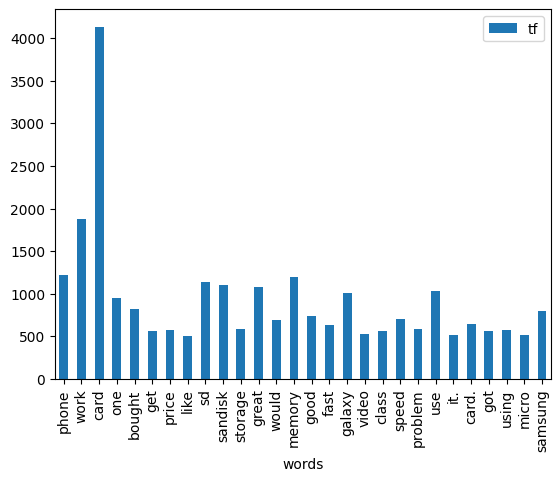

In [97]:
tf[tf["tf"] > 500].plot.bar(x="words", y="tf")
plt.show()

In [98]:
###############################
# Wordcloud
###############################

In [99]:
text = " ".join(i for i in df.reviewText)

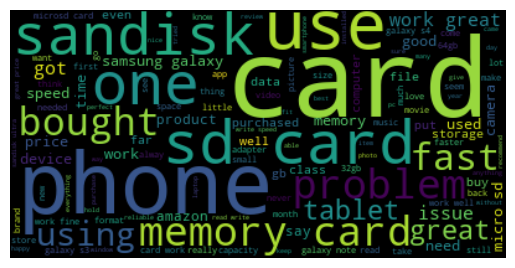

In [101]:
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

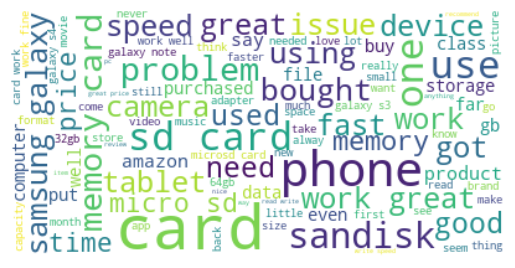

In [102]:
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [103]:
wordcloud.to_file("wordcloud.png")

In [104]:
###############################
# Şablonlara Göre Wordcloud
###############################

In [105]:
tr_mask = np.array(Image.open("tr.png"))

In [106]:
wc = WordCloud(background_color="white",
               max_words=1000,
               mask=tr_mask,
               contour_width=3,
               contour_color="firebrick")

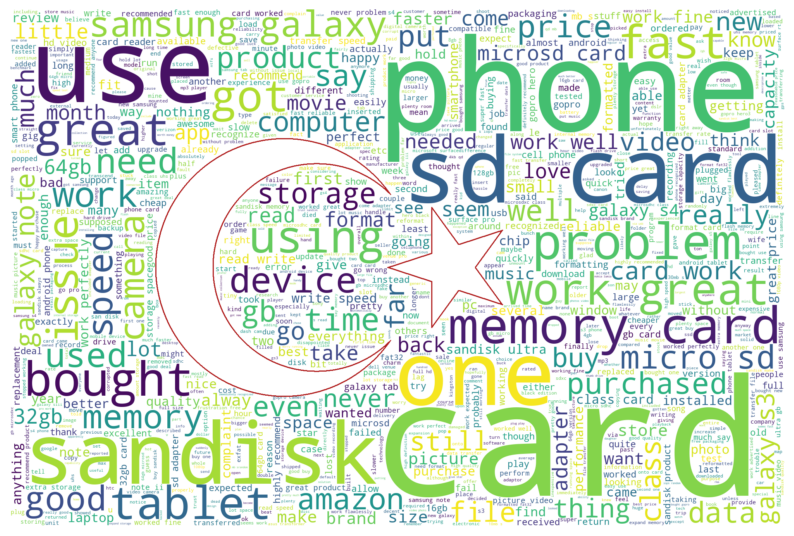

In [107]:
wc.generate(text)
plt.figure(figsize=[10, 10])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [108]:
##################################################
# 3. Sentiment Analysis
##################################################

In [109]:
df["reviewText"].head()

0                                              issues.
1    purchased device, worked advertised. never muc...
2    work expected. higher capacity. think made bit...
3    think worked 64gb card went south 3 one held p...
4    bought retail packaging, arrived legit, versio...
Name: reviewText, dtype: object

In [110]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...


True

In [111]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("The film was awesome")

{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}

In [112]:
sia.polarity_scores("I liked this music but it is not good as the other one")

{'neg': 0.207, 'neu': 0.666, 'pos': 0.127, 'compound': -0.298}

In [113]:
df["reviewText"][0:10].apply(lambda x: sia.polarity_scores(x))

0    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2    {'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp...
3    {'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'comp...
4    {'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'comp...
5    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
6    {'neg': 0.055, 'neu': 0.633, 'pos': 0.312, 'co...
7    {'neg': 0.045, 'neu': 0.675, 'pos': 0.28, 'com...
8    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
9    {'neg': 0.0, 'neu': 0.481, 'pos': 0.519, 'comp...
Name: reviewText, dtype: object

In [114]:
df["reviewText"][0:10].apply(lambda x: sia.polarity_scores(x)["compound"])

0   0.00
1   0.00
2   0.40
3   0.65
4   0.86
5   0.00
6   0.91
7   0.81
8   0.00
9   0.92
Name: reviewText, dtype: float64

In [115]:
df["polarity_score"] = df["reviewText"].apply(lambda x: sia.polarity_scores(x)["compound"])


In [116]:
###############################
# 4. Feature Engineering
###############################

In [117]:
df["reviewText"][0:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

0    neg
1    neg
2    pos
3    pos
4    pos
5    neg
6    pos
7    pos
8    neg
9    pos
Name: reviewText, dtype: object

In [118]:
df["sentiment_label"] = df["reviewText"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

In [119]:
df["sentiment_label"].value_counts()

sentiment_label
pos    3932
neg     983
Name: count, dtype: int64

In [120]:
df.groupby("sentiment_label")["overall"].mean()

sentiment_label
neg   4.11
pos   4.71
Name: overall, dtype: float64

In [121]:
df["sentiment_label"] = LabelEncoder().fit_transform(df["sentiment_label"])

In [122]:
y = df["sentiment_label"]
X = df["reviewText"]

In [123]:
###############################
# Count Vectors
###############################

In [124]:
# Count Vectors: frekans temsiller
# TF-IDF Vectors: normalize edilmiş frekans temsiller
# Word Embeddings (Word2Vec, GloVe, BERT vs)

In [125]:
# words
# kelimelerin nümerik temsilleri

In [126]:
# characters
# karakterlerin numerik temsilleri

In [127]:
# ngram
a = """Bu örneği anlaşılabilmesi için daha uzun bir metin üzerinden göstereceğim.
N-gram'lar birlikte kullanılan kelimelerin kombinasyolarını gösterir ve feature üretmek için kullanılır"""

In [128]:
TextBlob(a).ngrams(3)

[WordList(['Bu', 'örneği', 'anlaşılabilmesi']),
 WordList(['örneği', 'anlaşılabilmesi', 'için']),
 WordList(['anlaşılabilmesi', 'için', 'daha']),
 WordList(['için', 'daha', 'uzun']),
 WordList(['daha', 'uzun', 'bir']),
 WordList(['uzun', 'bir', 'metin']),
 WordList(['bir', 'metin', 'üzerinden']),
 WordList(['metin', 'üzerinden', 'göstereceğim']),
 WordList(['üzerinden', 'göstereceğim', "N-gram'lar"]),
 WordList(['göstereceğim', "N-gram'lar", 'birlikte']),
 WordList(["N-gram'lar", 'birlikte', 'kullanılan']),
 WordList(['birlikte', 'kullanılan', 'kelimelerin']),
 WordList(['kullanılan', 'kelimelerin', 'kombinasyolarını']),
 WordList(['kelimelerin', 'kombinasyolarını', 'gösterir']),
 WordList(['kombinasyolarını', 'gösterir', 've']),
 WordList(['gösterir', 've', 'feature']),
 WordList(['ve', 'feature', 'üretmek']),
 WordList(['feature', 'üretmek', 'için']),
 WordList(['üretmek', 'için', 'kullanılır'])]

In [129]:
###############################
# Count Vectors
###############################

In [134]:
from sklearn.feature_extraction.text import CountVectorizer

In [131]:
corpus = ['This is the first document.',
          'This document is the second document.',
          'And this is the third one.',
          'Is this the first document?']

In [137]:
# word frekans
vectorizer = CountVectorizer()
X_c = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()
X_c.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]], dtype=int64)

In [139]:
# n-gram frekans
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X_n = vectorizer2.fit_transform(corpus)
vectorizer2.get_feature_names_out()
X_n.toarray()

array([[0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0],
       [0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1]], dtype=int64)

In [140]:
vectorizer = CountVectorizer()
X_count = vectorizer.fit_transform(X)

In [142]:
vectorizer.get_feature_names_out()[10:15]
X_count.toarray()[10:15]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [143]:
###############################
# TF-IDF
###############################

In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_word_vectorizer = TfidfVectorizer()
X_tf_idf_word = tf_idf_word_vectorizer.fit_transform(X)

In [145]:
tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range=(2, 3))
X_tf_idf_ngram = tf_idf_ngram_vectorizer.fit_transform(X)

In [146]:
###############################
# 5. Sentiment Modeling
###############################

In [147]:
# 1. Text Preprocessing
# 2. Text Visualization
# 3. Sentiment Analysis
# 4. Feature Engineering
# 5. Sentiment Modeling

In [149]:
###############################
# Logistic Regression
###############################

In [150]:
log_model = LogisticRegression().fit(X_tf_idf_word, y)

In [151]:
cross_val_score(log_model,
                X_tf_idf_word,
                y,
                scoring="accuracy",
                cv=5).mean()

0.8274669379450662

In [152]:
new_review = pd.Series("this product is great")
new_review = pd.Series("look at that shit very bad")
new_review = pd.Series("it was good but I am sure that it fits me")

In [153]:
new_review = TfidfVectorizer().fit(X).transform(new_review)

In [154]:
log_model.predict(new_review)

array([1])

In [155]:
random_review = pd.Series(df["reviewText"].sample(1).values)

In [156]:
new_review = TfidfVectorizer().fit(X).transform(random_review)

In [157]:
log_model.predict(new_review)

array([1])

In [158]:
###############################
# Random Forests
###############################

In [159]:
# Count Vectors
rf_model = RandomForestClassifier().fit(X_count, y)
cross_val_score(rf_model, X_count, y, cv=5, n_jobs=-1).mean()

0.8463886063072227

In [160]:
# TF-IDF Word-Level
rf_model = RandomForestClassifier().fit(X_tf_idf_word, y)
cross_val_score(rf_model, X_tf_idf_word, y, cv=5, n_jobs=-1).mean()

0.8325534079348932

In [161]:
# TF-IDF N-GRAM
rf_model = RandomForestClassifier().fit(X_tf_idf_ngram, y)
cross_val_score(rf_model, X_tf_idf_ngram, y, cv=5, n_jobs=-1).mean()

0.780061037639878

In [162]:
###############################
# Hiperparametre Optimizasyonu
###############################

In [163]:
rf_model = RandomForestClassifier(random_state=17)

In [164]:
rf_params = {"max_depth": [8, None],
             "max_features": [7, "auto"],
             "min_samples_split": [2, 5, 8],
             "n_estimators": [100, 200]}

In [165]:
rf_best_grid = GridSearchCV(rf_model,
                            rf_params,
                            cv=5,
                            n_jobs=-1,
                            verbose=1).fit(X_count, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [166]:
rf_best_grid.best_params_

{'max_depth': None,
 'max_features': 7,
 'min_samples_split': 2,
 'n_estimators': 100}

In [167]:
rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X_count, y)


In [168]:
cross_val_score(rf_final, X_count, y, cv=5, n_jobs=-1).mean()

0.8118006103763988